# Text Classification using Convolutional Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
dataset,info = tfds.load("imdb_reviews/subwords8k",with_info = True,as_supervised = True)
tokenizer = info.features['text'].encoder

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJED0TZ/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJED0TZ/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJED0TZ/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
buffer_size = 10000
batch_size = 256

train_data ,test_data = dataset['train'],dataset['test']
train_dataset = train_data.shuffle(buffer_size)
train_dataset = train_dataset.padded_batch(batch_size)
test_dataset = test_data.padded_batch(batch_size)

In [4]:
# testing the shape with conv1d and globalmaxpooling
# hyperparameters

batch_size = 1
timesteps = 20
features = 20
filters = 128
kernel_size = 5

# define the array
random_input = np.random.rand(batch_size,timesteps,features)
print(f"shape of the input array : {random_input.shape}")

# Pass the array to conv layer
conv1d = tf.keras.layers.Conv1D(filters = filters,kernel_size = kernel_size,activation = 'relu')
result = conv1d(random_input)
print(f"shape of conv1d : {result.shape}")

# Pass the array to the max pooling
gmp = tf.keras.layers.GlobalMaxPooling1D()
result = gmp(result)
print(f"shape of the global max pooling : {result.shape}")

shape of the input array : (1, 20, 20)
shape of conv1d : (1, 16, 128)
shape of the global max pooling : (1, 128)


In [5]:
# Hyperparameters
embedding_dim = 64
filters = 128
kernel_size = 5
dense_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size,embedding_dim),
    tf.keras.layers.Conv1D(filters = filters,kernel_size = kernel_size,activation ='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [7]:
history = model.fit(train_dataset,epochs = 10,validation_data = test_dataset)

Epoch 1/10
98/98 [==============================] - 36s 367ms/step - loss: 0.2909 - accuracy: 0.8788 - val_loss: 0.2702 - val_accuracy: 0.8887
Epoch 3/10
98/98 [==============================] - 27s 273ms/step - loss: 0.1502 - accuracy: 0.9474 - val_loss: 0.2660 - val_accuracy: 0.8893
Epoch 4/10
98/98 [==============================] - 24s 234ms/step - loss: 0.0646 - accuracy: 0.9853 - val_loss: 0.2839 - val_accuracy: 0.8934
Epoch 5/10
98/98 [==============================] - 19s 198ms/step - loss: 0.0203 - accuracy: 0.9985 - val_loss: 0.3170 - val_accuracy: 0.8924
Epoch 6/10
98/98 [==============================] - 17s 174ms/step - loss: 0.0068 - accuracy: 0.9998 - val_loss: 0.3434 - val_accuracy: 0.8920
Epoch 7/10
98/98 [==============================] - 14s 146ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3656 - val_accuracy: 0.8930
Epoch 8/10
98/98 [==============================] - 14s 147ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3830 - val_accuracy: 0.8928

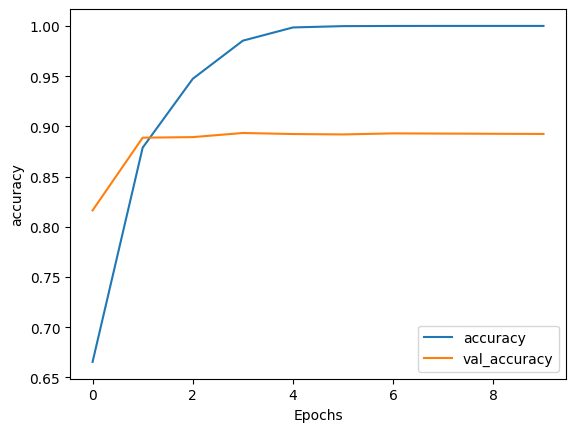

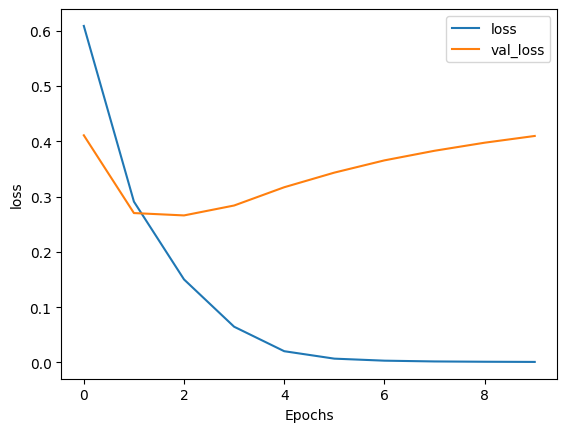

In [8]:
# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")